In [1]:
import pandas as pd
import numpy as np

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import MinMaxScaler
import env
import wrangle
from wrangle import get_zillow_data

## Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

1. Load your zillow dataset.

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

Here is some sample code to get you started:

* from sklearn.linear_model import LinearRegression

* # assuming X and y are already defined
    model = LinearRegression().fit(X, y)
    predictions = model.predict(X)
    
Modify and add to the code above as necessary for it to work with the zillow dataset.

3. Plot the residuals for the linear regression model that you made.

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and  root mean squared error for your model.

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

7. What is the amount of variance explained in your model?

8. Is your model better than the baseline model?

9. Create a file named evaluate.py that contains the following functions.

* plot_residuals(y, yhat): creates a residual plot
* regression_errors(y, yhat): returns the following values:
   * sum of squared errors (SSE)
   * explained sum of squares (ESS)
   * total sum of squares (TSS)
   * mean squared error (MSE)
   * root mean squared error (RMSE)
* baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
* better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

## Bonus Exercises

1. Load the tips dataset from either pydataset or seaborn. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

2. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [2]:
df = get_zillow_data()

In [3]:
df

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...,...
2152859,2152859,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152860,2152860,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,2152861,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152862,2152862,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [4]:
df = df.rename(columns={"bedroomcnt": "bedroom", "bathroomcnt": "bathroom", "calculatedfinishedsquarefeet":"area",
                  "taxvaluedollarcnt":"taxvalue"})

In [5]:
df

,Unnamed: 0,bedroom,bathroom,area,taxvalue,yearbuilt,taxamount,fips
0,0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...,...
2152859,2152859,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152860,2152860,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,2152861,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152862,2152862,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [6]:
# put all null values into a variable
missing_values_count = df.isnull().sum()
missing_values_count

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Unnamed: 0       0
bedroom         11
bathroom        11
area          8485
taxvalue       493
yearbuilt     9338
taxamount     4442
fips             0
dtype: int64

In [7]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.13226567028850872


In [8]:
#majority yearbuilt NAN possibly because homes havent been built
round((missing_values_count / total_cells) * 100,2)

Unnamed: 0    0.00
bedroom       0.00
bathroom      0.00
area          0.05
taxvalue      0.00
yearbuilt     0.05
taxamount     0.03
fips          0.00
dtype: float64

In [9]:
#only selected the rows in each column thats not na
#null values make a small percentage of each column so i dropped them
#based on the home possibly not being built or fully bulit that square feet could be calculated
df = df[df['area'].notna()]
df = df[df['yearbuilt'].notna()]
df = df[df['taxamount'].notna()]
df = df[df['taxvalue'].notna()]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152863
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   bedroom     float64
 2   bathroom    float64
 3   area        float64
 4   taxvalue    float64
 5   yearbuilt   float64
 6   taxamount   float64
 7   fips        float64
dtypes: float64(7), int64(1)
memory usage: 147.0 MB


In [11]:
#Split the data for exploration using train dataset
from wrangle import train_test_split
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train, test = train_test_split(df, random_state=123)
train, validate = train_test_split(train, random_state=123)

In [12]:
train.shape, test.shape, validate.shape

((1203882, 8), (535059, 8), (401294, 8))

Text(0.5, 1.0, 'Scaled')

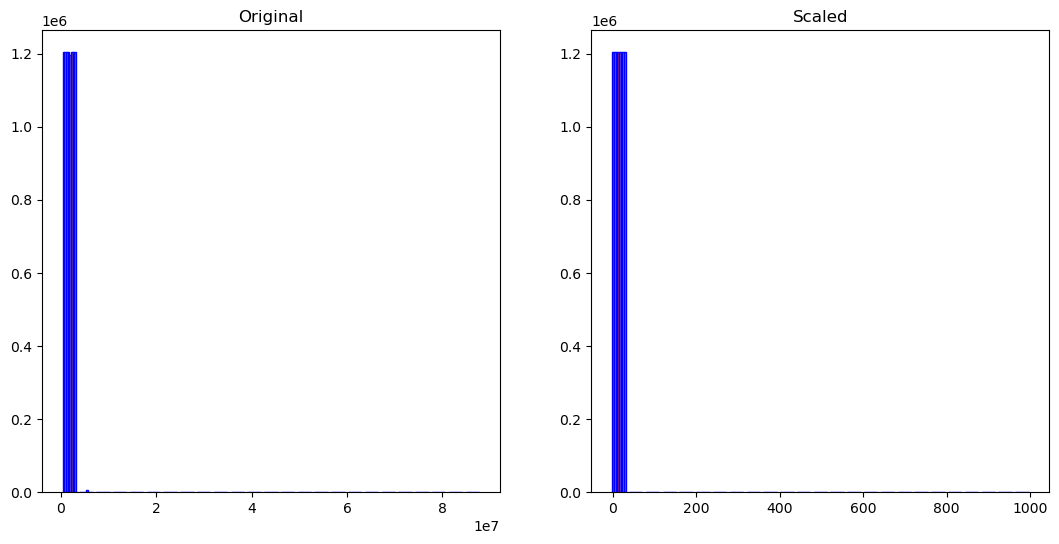

In [13]:
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

x_train_scaled = scaler.transform(train)
x_validate_scaled = scaler.transform(validate)
x_test_scaled = scaler.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='blue')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='blue')
plt.title('Scaled')

In [14]:
df.idxmax()

Unnamed: 0    2152863
bedroom         26485
bathroom      1657948
area           849924
taxvalue       530834
yearbuilt          21
taxamount      530834
fips               52
dtype: int64

4          False
6          False
7          False
11         False
14         False
           ...  
2152857    False
2152859    False
2152860    False
2152862    False
2152863    False
Length: 2140235, dtype: bool

3. Plot the residuals for the linear regression model that you made.